# Check the distribution of zscored variables (TSI and Q)

In [1]:
import numpy as np
import xarray as xr
from glob import glob

In [2]:
from credit.data import get_forward_data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Check normalized TSI

In [4]:
# glob all tsi files and lazzy open as xr.Dataset
filenames = sorted(glob('/glade/derecho/scratch/dgagne/credit_solar_1h_0.25deg/*.nc'))
#filenames = sorted(glob('/glade/derecho/scratch/schreck/STAGING/TOTAL_*'))

train_years_range = [1979, 2014]
train_years = [str(year) for year in range(train_years_range[0], train_years_range[1])]
train_files = [file for file in filenames if any(year in file for year in train_years)]

list_ds_train = []

for fn in train_files:
    list_ds_train.append(get_forward_data(fn))

### how tsi mean std was computed

In [5]:
# # loop thorugh files and compute mean and std 
# for i_ds, ds in enumerate(list_ds_train):
    
#     print('{}'.format(train_files[i_ds]))
    
#     mean_current_yr = float(ds['tsi'].mean())
#     var_current_yr = float(ds['tsi'].var())
#     L = len(ds['tsi'])*640*1280
    
#     print('{} - {}'.format(mean_current_yr, var_current_yr))
    
#     print('... done')
    
#     if i_ds == 0:
    
#         mean_combined = mean_current_yr
#         var_combined = var_current_yr
#         L_combined = L
        
#     else:
#         print('pooling ...')
#         # https://math.stackexchange.com/questions/2971315/how-do-i-combine-standard-deviations-of-two-groups
#         mean_new = (L*mean_current_yr + L_combined*mean_combined) / (L + L_combined)
#         var_new = ((L-1)*var_current_yr + (L_combined-1)*var_combined) / (L + L_combined -1)
#         var_new_adjust = (L*L_combined*(mean_current_yr -mean_combined)**2) / (L + L_combined) / (L + L_combined -1)
    
#         mean_combined = mean_new
#         var_combined = var_new + var_new_adjust
#         L_combined = L_combined + L

#         print('{} - {}'.format(mean_combined, var_combined))
        
#         print('... done')

In [6]:
NEW_mean = xr.open_dataset('/glade/campaign/cisl/aiml/ksha/CREDIT/mean_1h_0.25deg.nc')
NEW_std = xr.open_dataset('/glade/campaign/cisl/aiml/ksha/CREDIT/std_1h_0.25deg.nc')

In [7]:
mean_tsi = np.array(NEW_mean['tsi'])
std_tsi = np.array(NEW_std['tsi'])

In [8]:
mean_tsi

array(1056745.4357791)

In [9]:
std_tsi

array(286704.92081222)

In [10]:
ds_norm = (list_ds_train[1]['tsi'] - mean_tsi) / std_tsi

In [11]:
float(ds_norm.min())

-3.6858294010162354

In [12]:
float(ds_norm.max())

13.666143417358398

(array([4.05494919e+09, 4.59886082e+08, 4.63927537e+08, 4.64678371e+08,
        3.88565934e+08, 3.38631881e+08, 3.07630573e+08, 2.84333252e+08,
        2.65615965e+08, 1.67634011e+08]),
 array([-3.6858294 , -1.9506321 , -0.21543483,  1.5197624 ,  3.25495982,
         4.99015713,  6.72535419,  8.46055126, 10.19574928, 11.93094635,
        13.66614342]),
 <BarContainer object of 10 artists>)

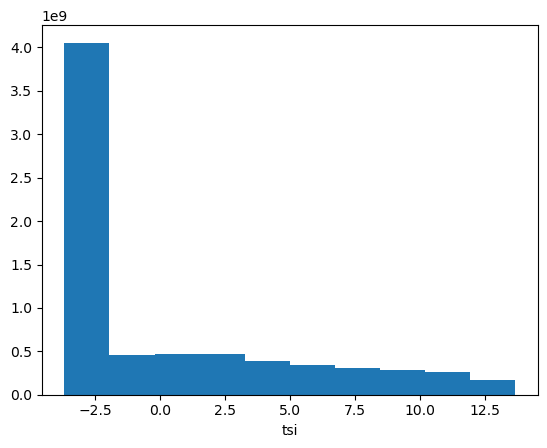

In [13]:
ds_norm.plot.hist()

## How about the old TSI? (almost the same result)

In [14]:
TOA_forcing_path = '/glade/derecho/scratch/dgagne/credit_scalers/solar_radiation_2024-03-29_0204.nc' 

ds_old = get_forward_data(TOA_forcing_path)

In [15]:
float(ds_old['tsi'].mean())

988673.375

In [16]:
float(ds_old['tsi'].std())

286413.65625

In [17]:
ds_old_norm = (ds_old['tsi'] - 988673.375) / 286413.65625

In [18]:
float(ds_old_norm.min())

-3.451907157897949

In [19]:
float(ds_old_norm.max())

12.8064546585083

(array([4.05552484e+09, 4.60095470e+08, 4.64335866e+08, 4.64872306e+08,
        3.88550438e+08, 3.38702576e+08, 3.07709871e+08, 2.84417025e+08,
        2.65689110e+08, 1.65955294e+08]),
 array([-3.45190716, -1.82607102, -0.2002348 ,  1.42560136,  3.05143762,
         4.67727375,  6.30311012,  7.92894602,  9.55478191, 11.18061829,
        12.80645466]),
 <BarContainer object of 10 artists>)

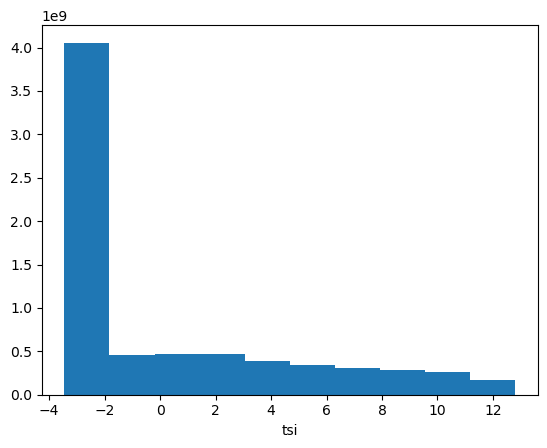

In [20]:
ds_old_norm.plot.hist()

## Check normalized 500 hPa Q

In [21]:
ERA_files = sorted(glob('/glade/derecho/scratch/schreck/STAGING/TOTAL_*'))
ERA_example = xr.open_zarr(ERA_files[0])

In [22]:
mean_q = np.array(NEW_mean['Q500'])
std_q = np.array(NEW_std['Q500'])

In [23]:
q_norm = (ERA_example['Q500'] - mean_q) / std_q

In [24]:
float(q_norm.min())

-0.8006894588470459

In [25]:
float(q_norm.max())

8.634900093078613

(array([5.32798104e+09, 9.28852172e+08, 4.50176044e+08, 3.02222878e+08,
        1.41169231e+08, 2.28775540e+07, 2.70937700e+06, 1.96942000e+05,
        6.71100000e+03, 5.40000000e+01]),
 array([-0.80068946,  0.1428695 ,  1.0864284 ,  2.02998734,  2.97354627,
         3.9171052 ,  4.86066437,  5.80422306,  6.74778223,  7.69134092,
         8.63490009]),
 <BarContainer object of 10 artists>)

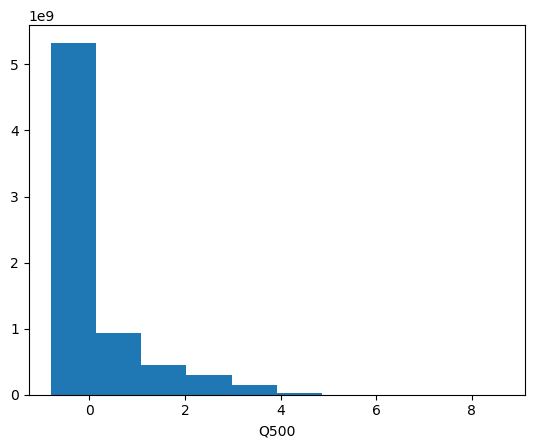

In [26]:
q_norm.plot.hist()

## Check top-of-atmos Q

In [27]:
ERA_files = sorted(glob('/glade/derecho/scratch/schreck/STAGING/TOTAL_*'))
ERA_example = xr.open_zarr(ERA_files[0])

In [28]:
mean_q_toa = np.array(NEW_mean['Q'].isel(level=0))
std_q_toa = np.array(NEW_std['Q'].isel(level=0))

In [29]:
q_toa_norm = (ERA_example['Q'].isel(level=0) - mean_q_toa) / std_q_toa

In [30]:
float(q_toa_norm.min())

-8.417872428894043

In [31]:
float(q_toa_norm.max())

0.8442316651344299

In [32]:
#q_toa_norm.plot.hist()

## Check surface Q

In [33]:
ERA_files = sorted(glob('/glade/derecho/scratch/schreck/STAGING/TOTAL_*'))
ERA_example = xr.open_zarr(ERA_files[0])

In [34]:
mean_q_surf = np.array(NEW_mean['Q'].isel(level=14))
std_q_surf = np.array(NEW_std['Q'].isel(level=14))

In [35]:
q_surf_norm = (ERA_example['Q'].isel(level=14) - mean_q_surf) / std_q_surf

In [36]:
float(q_surf_norm.min())

-1.1884249448776245

In [37]:
float(q_surf_norm.max())

3.684051752090454

(array([2.28670868e+09, 1.51475392e+09, 8.69768971e+08, 6.25075909e+08,
        5.48596400e+08, 8.00736199e+08, 5.21934553e+08, 8.34918700e+06,
        2.65732000e+05, 2.44900000e+03]),
 array([-1.18842494, -0.7011773 , -0.21392961,  0.27331805,  0.76056576,
         1.24781346,  1.73506105,  2.22230864,  2.70955634,  3.19680405,
         3.68405175]),
 <BarContainer object of 10 artists>)

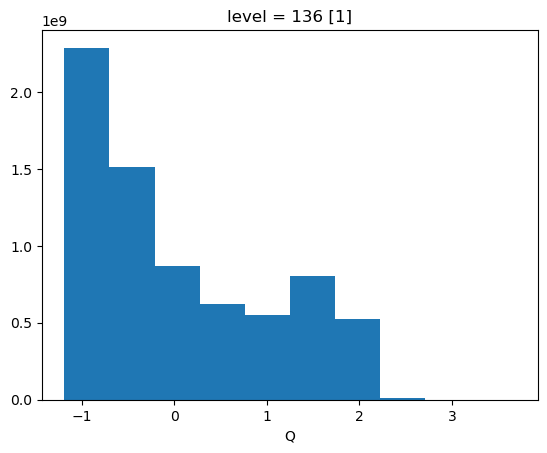

In [38]:
q_surf_norm.plot.hist()